In [283]:
import pandas as pd
import numpy as np
from statistics import mode

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from yellowbrick.classifier import ConfusionMatrix 

import warnings
warnings.simplefilter(action='ignore')

In [200]:
df = pd.read_csv('Heart.csv') ; df.head(3) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1


### Análise exploratória

In [18]:
print("Linhas: {}\nColunas: {}".format(df.shape[0], df.shape[1])); print("-"*40)
print("Data types:\n{}".format(df.dtypes)) ; print("-"*40)
print("Valores ausentes: \n{}".format(df.isnull().sum())) ; print("-"*40)
print("Valores Duplicados: \n{}".format(df.duplicated().sum())) ; print("-"*40)
print("Valores únicos: \n{}".format(df.nunique())) ; print("-"*40)

Linhas: 270
Colunas: 14
----------------------------------------
Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
----------------------------------------
Valores ausentes: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
----------------------------------------
Valores Duplicados: 
0
----------------------------------------
Valores únicos: 
age          41
sex           2
cp            4
trestbps     47
chol        144
fbs           2
restecg       3
thalach      90
exang         2
oldpeak      39
slope         3
ca            4
thal          3
target        2
dtype: int64
-

In [42]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


In [46]:
columns_categorical = ['target','sex','cp','restecg','exang','slope','ca','thal','fbs']

for column in columns_categorical:
    print(f"% de cada categoria presente em: {column}")
    print(df[column].value_counts(normalize=True).map("{:.1%}".format)) 
    print("-"*40)

% de cada categoria presente em: target
0    55.6%
1    44.4%
Name: target, dtype: object
----------------------------------------
% de cada categoria presente em: sex
1    67.8%
0    32.2%
Name: sex, dtype: object
----------------------------------------
% de cada categoria presente em: cp
3    47.8%
2    29.3%
1    15.6%
0     7.4%
Name: cp, dtype: object
----------------------------------------
% de cada categoria presente em: restecg
2    50.7%
0    48.5%
1     0.7%
Name: restecg, dtype: object
----------------------------------------
% de cada categoria presente em: exang
0    67.0%
1    33.0%
Name: exang, dtype: object
----------------------------------------
% de cada categoria presente em: slope
0    48.1%
1    45.2%
2     6.7%
Name: slope, dtype: object
----------------------------------------
% de cada categoria presente em: ca
0    59.3%
1    21.5%
2    12.2%
3     7.0%
Name: ca, dtype: object
----------------------------------------
% de cada categoria presente em: thal
1  

In [138]:
group0 = df[['target','sex','age']].groupby(['sex','target']).agg({'age':np.mean})
print("Médias de idades por sexo e doença cardíaca")
group0 = group0.rename(index={0:"Feminino",1:"Masculino"}, level=0)
group0 = group0.rename(index={0:"no",1:"yes"}, level=1)
group0.index.names = ['sex','heart disease']
display(group0)

print("-"*40)

group = df[['target','sex','trestbps','chol']].groupby(['sex','target']).agg({'trestbps':np.mean,'chol':np.mean})
print("Médias de pressão arterial em repouso e colesterol sérico")
group = group.rename(index={0:"Feminino",1:"Masculino"}, level=0)
group = group.rename(index={0:"no",1:"yes"}, level=1)
group.index.names = ['sex','heart disease']
display(group)

print("-"*40)

print("Categorias mais associadas agrupados por sexo e doença cardíaca \n")
print("- Tipo de dor torácica\n- Níveis de açúcar no sangue em jejum > 120 mg/dl\n- Angina induzida pelo exercício\n- Resultado do eletrocardiograma em repouso\n- Tipo de distúrbio sanguíneo")
group2 = df[['target','sex','cp','fbs','exang','restecg','thal','ca']].groupby(['sex','target']).agg({mode})
group2 = group2.rename(index={0:"Feminino",1:"Masculino"}, level=0)
group2 = group2.rename(index={0:"no",1:"yes"}, level=1)
group2.index.names = ['sex','heart disease']
display(group2)

Médias de idades por sexo e doença cardíaca


age
sex       heart disease           
Feminino  no             54.582090
          yes            59.350000
Masculino no             51.192771
          yes            56.040000

----------------------------------------
Médias de pressão arterial em repouso e colesterol sérico


trestbps        chol
sex       heart disease                        
Feminino  no             128.283582  257.208955
          yes            148.650000  290.000000
Masculino no             129.337349  233.722892
          yes            131.600000  249.760000

----------------------------------------
Categorias mais associadas agrupados por sexo e doença cardíaca 

- Tipo de dor torácica
- Níveis de açúcar no sangue em jejum > 120 mg/dl
- Angina induzida pelo exercício
- Resultado do eletrocardiograma em repouso
- Tipo de distúrbio sanguíneo


cp  fbs exang restecg thal   ca
                        mode mode  mode    mode mode mode
sex       heart disease                                  
Feminino  no               2    0     0       0    1    0
          yes              3    0     0       2    3    0
Masculino no               2    0     0       0    1    0
          yes              3    0     1       2    3    1

In [205]:
sns.set_theme(style="darkgrid")

cate = ['cp','exang','thal','ca','fbs','slope','restecg']
continua = ['age','trestbps','thalach','oldpeak','chol'] 

description1 = ['Tipo de dor torácica','Angina induzida','Distúrbio sanguíneo','Número de vasos principais',
               'Níveis de açúcar no sangue','Segmento ST','Resultado do eletrocardiograma']

description2 = ['Idade','Nível de pressão arterial','Frequência cardíaca máxima','Depressão do ST','Colesterol sérico em mg/dl '] 

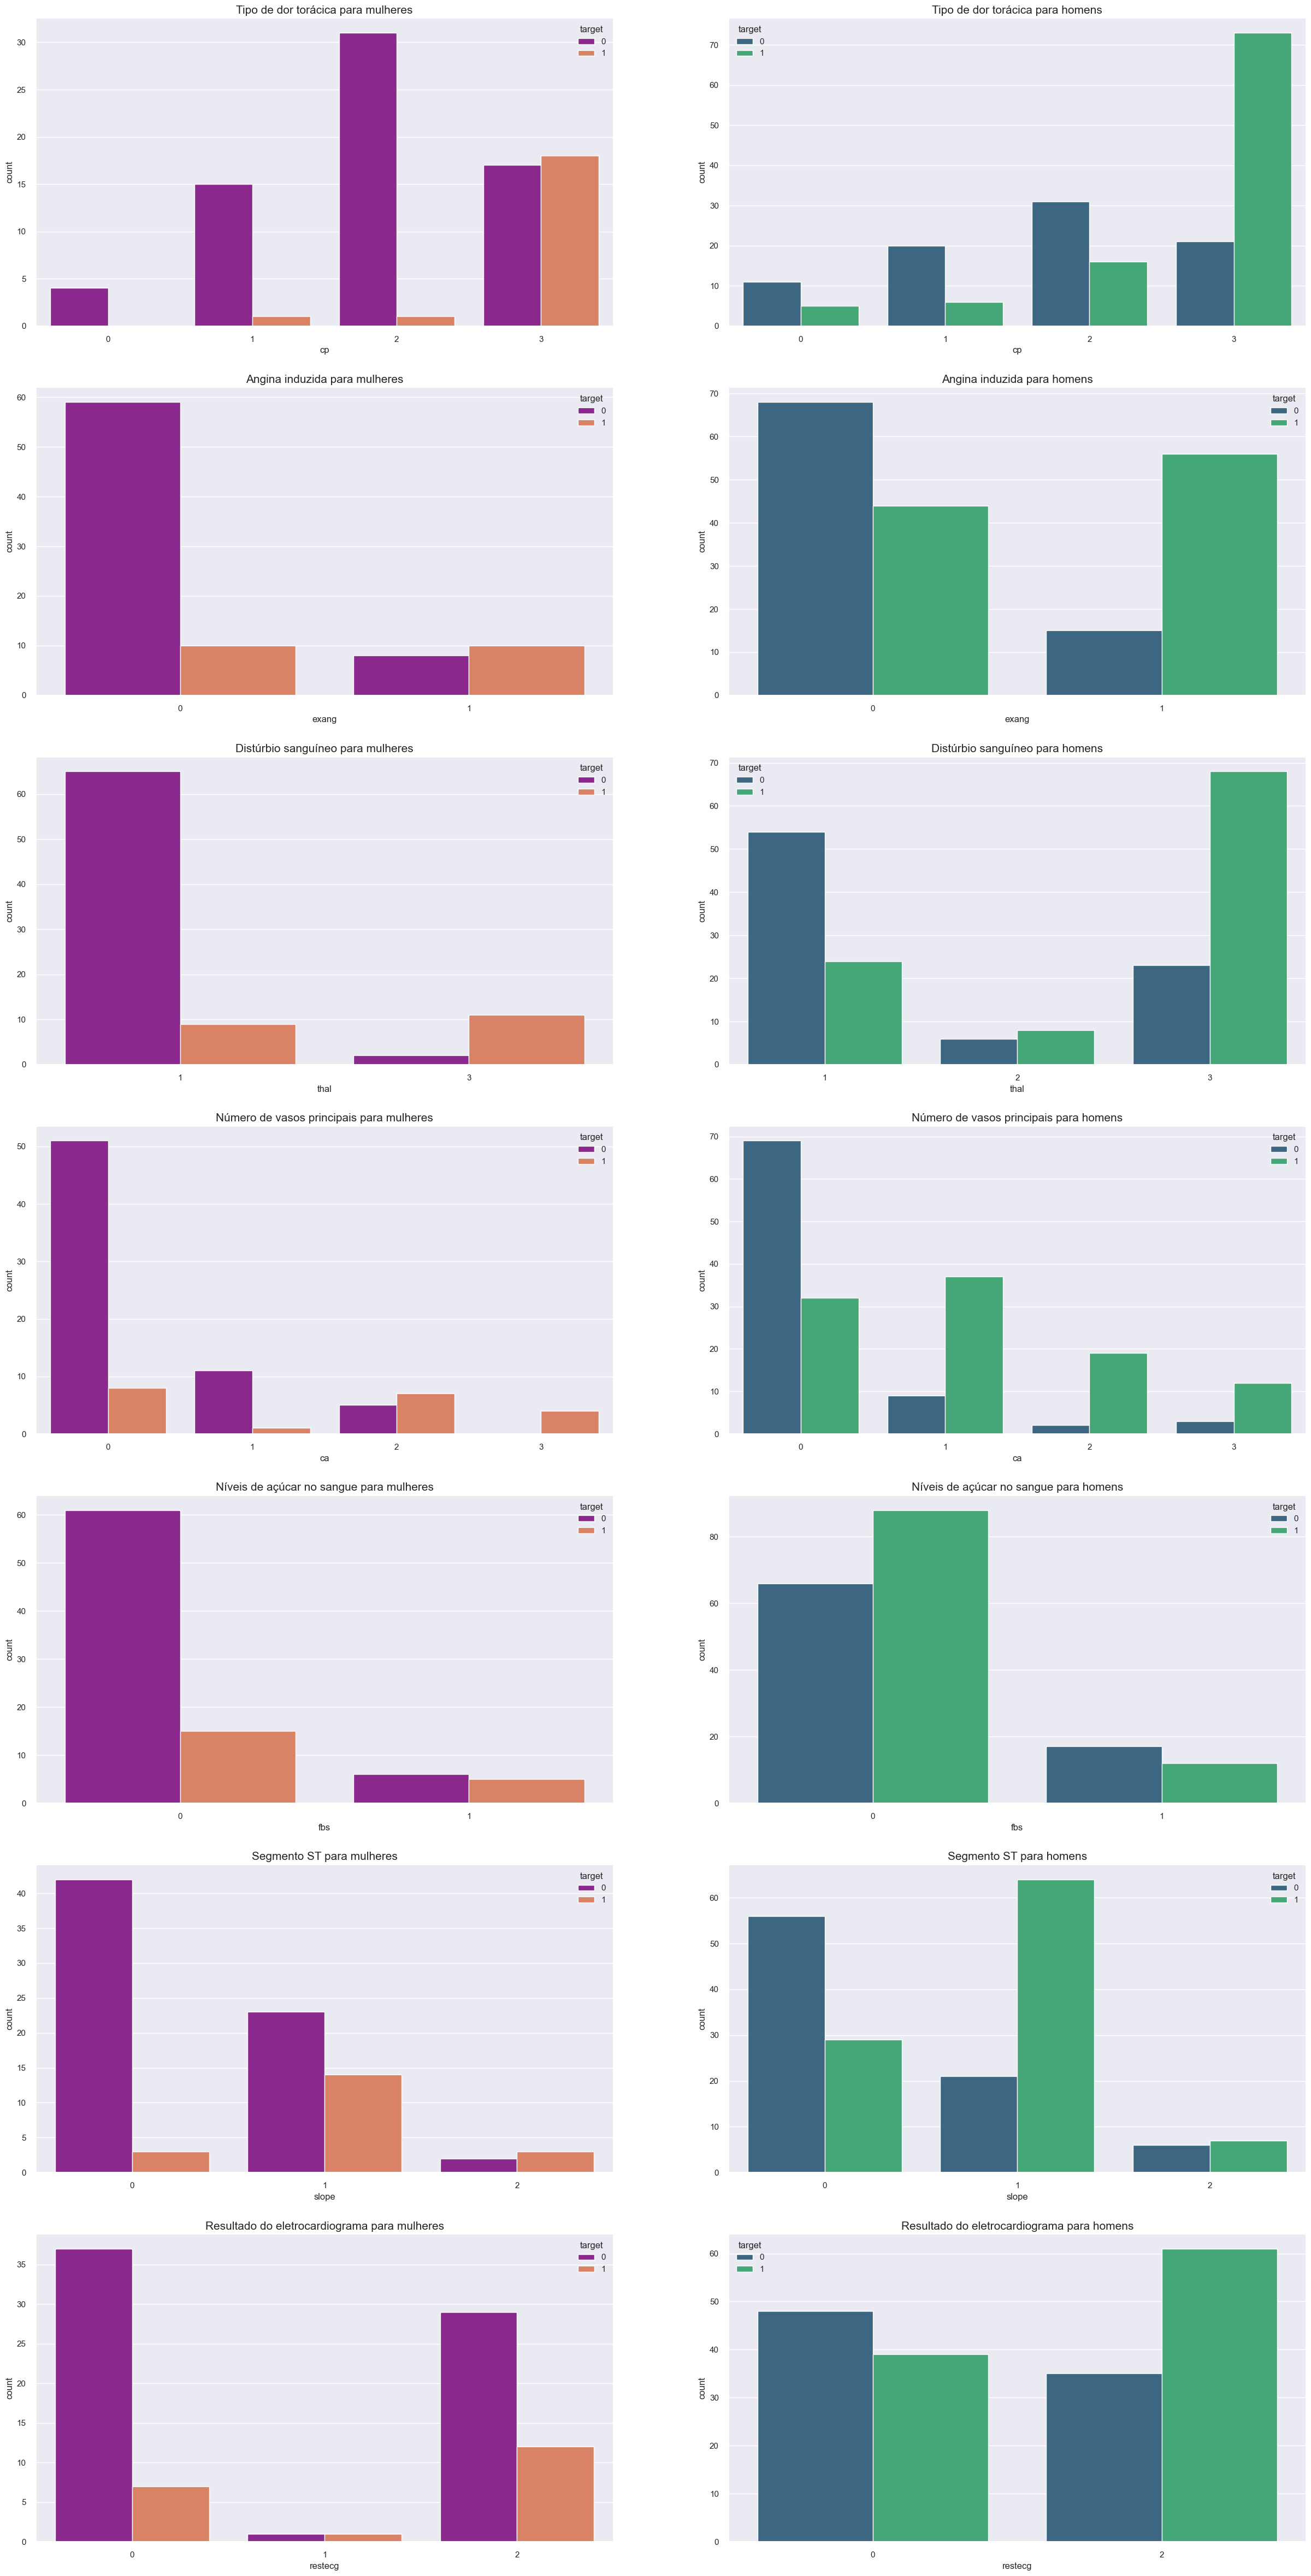

In [206]:
df_wom = df[df['sex'] == 0]
df_men = df[df['sex'] == 1]

figsize, ax = plt.subplots(7,2,figsize=(30,60))

ax_1 = 0
for column, desc in zip(cate,description1):
    sns.countplot(df_wom, x=column ,hue="target",palette="plasma",ax=ax[ax_1,0])
    sns.countplot(df_men, x=column,hue="target",palette="viridis",ax=ax[ax_1,1])
    ax[ax_1,0].set_title(f"{desc} para mulheres",fontsize=15)
    ax[ax_1,1].set_title(f"{desc} para homens",fontsize=15)
    ax_1+=1

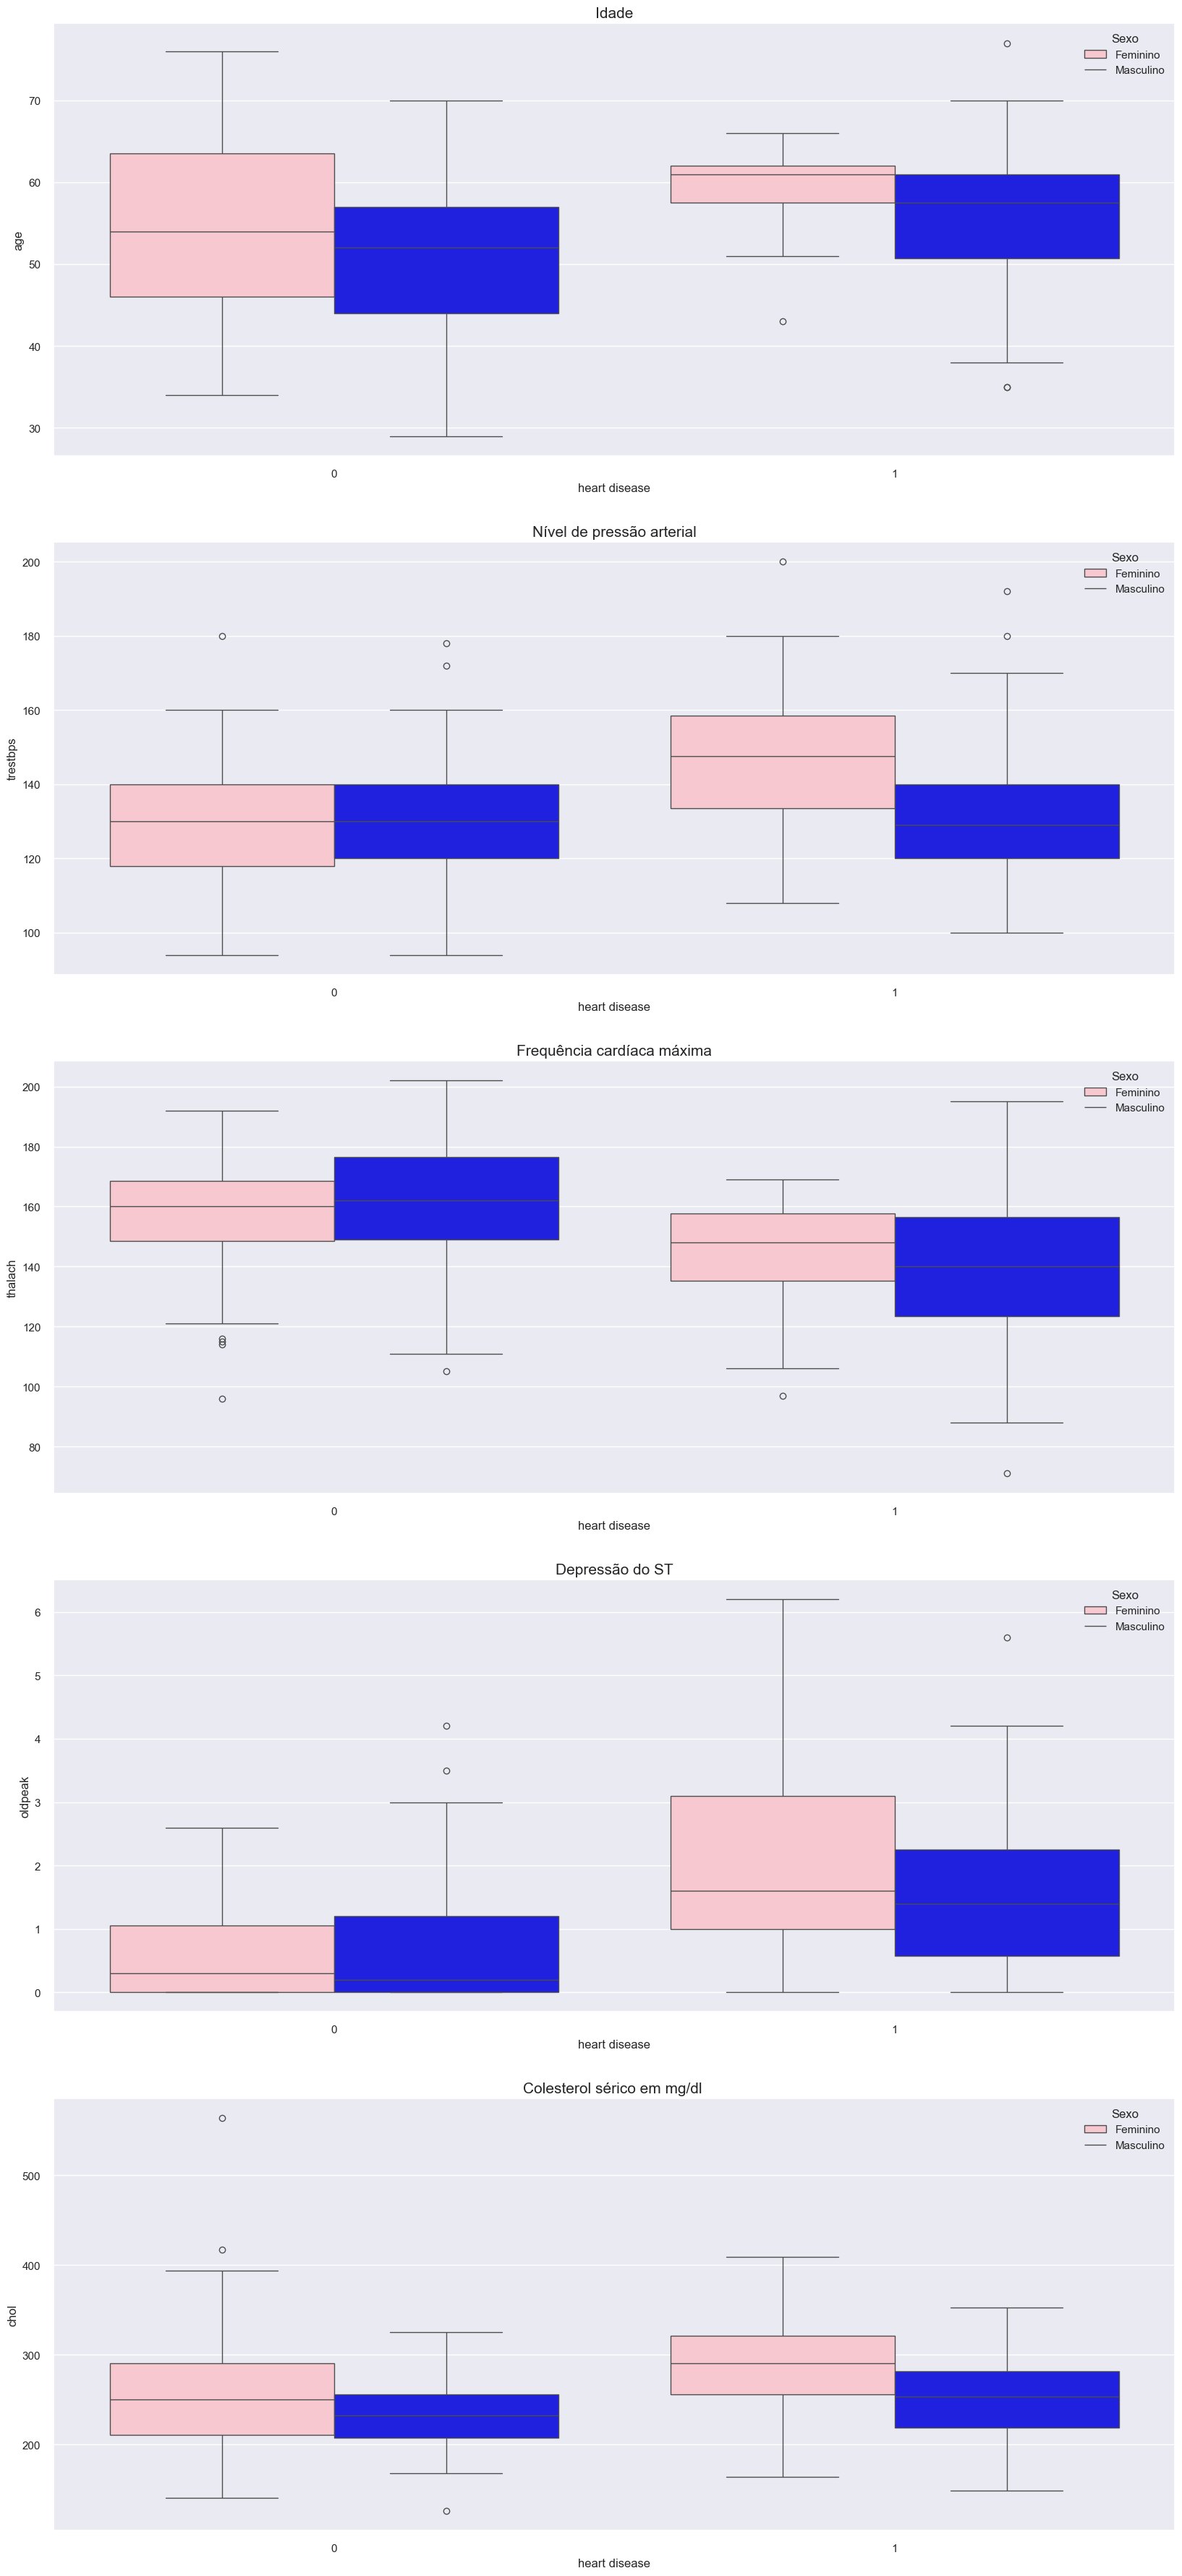

In [230]:
figsize, ax = plt.subplots(5,1,figsize=(20,45))

my_pal = {0: "pink", 1: "blue"}

ax__ = 0
for column, desc in zip(continua,description2):
    sns.boxplot(data=df, x='target', y=column, hue='sex', showfliers = True, palette=my_pal,ax=ax[ax__])
    ax[ax__].legend(title='Sexo',labels=['Feminino', 'Masculino'])
    ax[ax__].set(xlabel='heart disease', ylabel=f'{column}')
    ax[ax__].set_title(f"{desc}",fontsize=15)
    ax__+=1

### Pré Processamento e Machine Learning

In [312]:
def find_outlier_iqr(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers_list = []
    
    for value in df[column].values:
        if value > upper or value < lower:
            outliers_list.append(np.nan)
        else:
            outliers_list.append(value)
        
    print("Outliers {} number detected: {}".format(column,outliers_list.count(np.nan)))
    return outliers_list

def drop_outlier(df):
    return df.dropna()

In [313]:
columns_to_check = ['trestbps','thalach','oldpeak','chol'] 

df_ml = df.copy()

for column in columns_to_check:
    df_ml[column] = find_outlier_iqr(df_ml,column)

Outliers trestbps number detected: 9
Outliers thalach number detected: 1
Outliers oldpeak number detected: 4
Outliers chol number detected: 5


In [314]:
df_ml.isnull().sum()

age         0
sex         0
cp          0
trestbps    9
chol        5
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     4
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

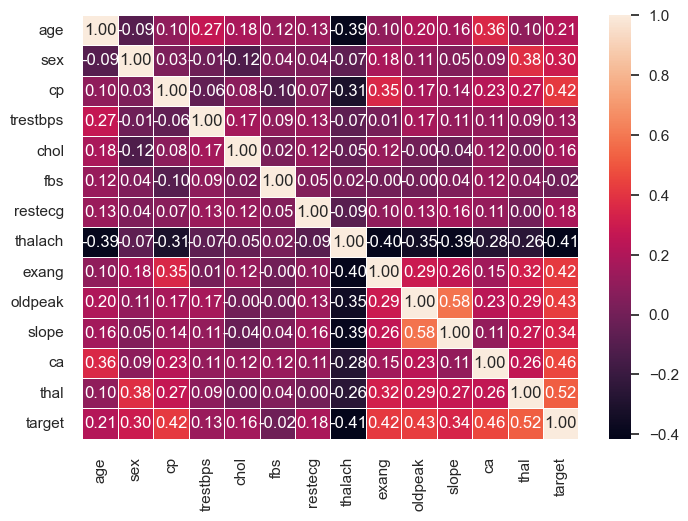

In [315]:
corr = df_ml.corr()
sns.heatmap(corr,annot=True,
    fmt='.2f',
    linewidths=0.5,
    linecolor='white')

In [316]:
x = df_ml.drop('target',axis=1)
y = df_ml['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=1)

x_train.fillna(x_train.mean(),inplace=True)

x_test.fillna(x_train.mean(),inplace=True)

In [317]:
def avaliacao_desempenho(y_pred, y_true):
    acc       = accuracy_score(y_pred,y_true)
    recall    = recall_score(y_pred,y_true)
    precision = precision_score(y_pred,y_true) 
    
    print(f"acc: {acc}")
    print(f"recall: {recall}")
    print(f"precision: {precision}")
    

In [318]:
def confusion_m(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    print(cm)
    
    plt.figure()
    sns.heatmap(cm, annot=True, cmap="crest", fmt='g', cbar=False)
    plt.show() 

In [319]:
def models(x_train,x_test,y_train,y_test):
    models = {"Logistic Regression": LogisticRegression(),"Decision Tree": DecisionTreeClassifier(), "Random Forest": RandomForestClassifier(n_estimators=120)}
    
    for model, func in models.items():
        print(f"Model: {model}")
        modelo = func
        modelo.fit(x_train,y_train)
        
        y_pred = modelo.predict(x_test)
        
        avaliacao_desempenho(y_pred, y_test)
        
        confusion_m(y_pred, y_test)
        
        
        print("-"*40)

Model: Logistic Regression
acc: 0.8395061728395061
recall: 0.8611111111111112
precision: 0.7948717948717948
[[37  8]
 [ 5 31]]


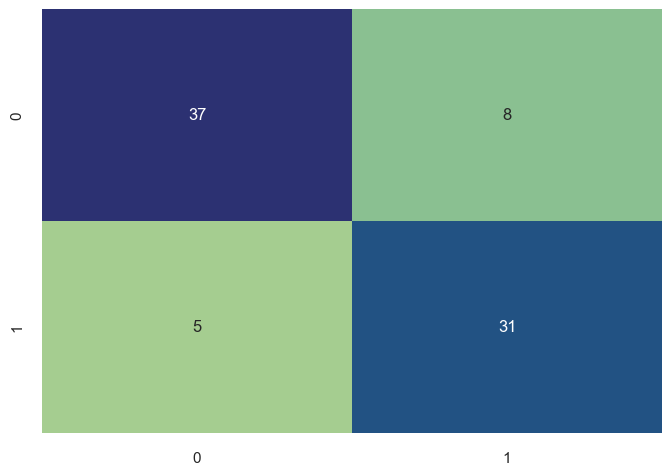

----------------------------------------
Model: Decision Tree
acc: 0.6666666666666666
recall: 0.6764705882352942
precision: 0.5897435897435898
[[31 16]
 [11 23]]


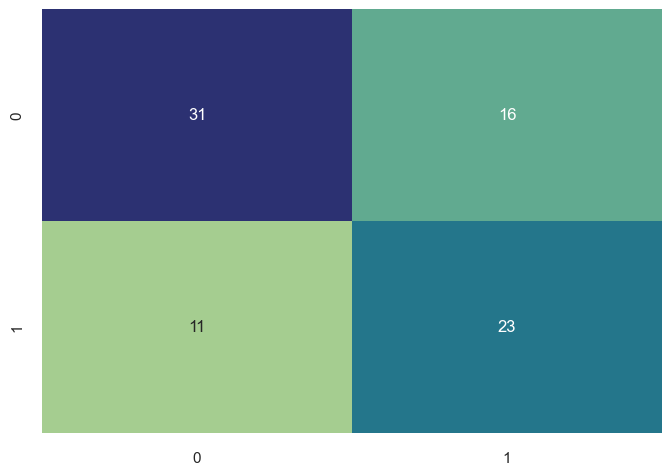

----------------------------------------
Model: Random Forest
acc: 0.8024691358024691
recall: 0.8108108108108109
precision: 0.7692307692307693
[[35  9]
 [ 7 30]]


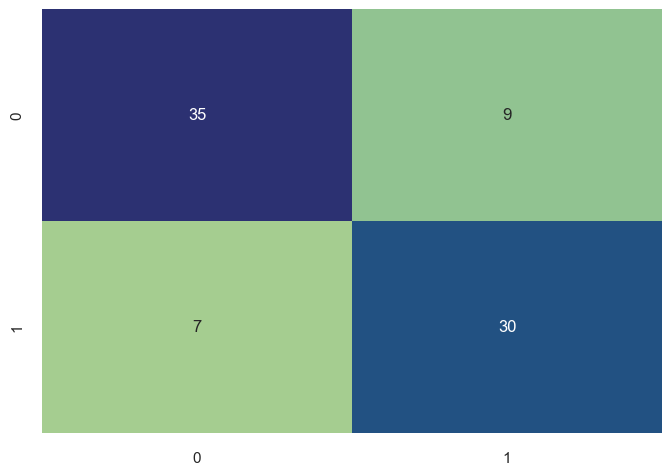

----------------------------------------


In [320]:
models(x_train, x_test, y_train, y_test)